In [ ]:
%pip install jupyter pandas sympy
%pip install beautifulsoup4 lxml html5lib
%pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.8 MB/s eta 0:00:00


In [5]:
from pandas import read_html

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame with consistent data for fish and bacteria populations
data = pd.DataFrame({
    'Year': range(2010, 2021),
    'Fish Population': [1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000],
    'Bacteria Population': [5000, 5200, 5300, 5500, 5800, 6000, 6200, 6400, 6600, 7000, 7200],
    'Temperature (Celsius)': [25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 31],
    'pH Level': [7.2, 7.3, 7.4, 7.2, 7.5, 7.6, 7.2, 7.4, 7.3, 7.5, 7.4],
    'Dissolved Oxygen (mg/L)': [8, 7.5, 8.2, 8.1, 8.5, 7.9, 8.3, 8, 7.8, 8.6, 8.2]
})

# Convert the DataFrame to an HTML table
html_table = data.to_html(classes='table table-bordered table-striped', index=False, escape=False)

# Save the HTML table to a file (optional)
with open('data_table.html', 'w') as file:
    file.write(html_table)



In [15]:
filename = 'data_table.html'
tables = read_html(filename,
                   header=0,
                   index_col=0,
                   decimal='M')

In [16]:
df = tables[0]

In [17]:
print(df.head())

      Fish Population  Bacteria Population  Temperature (Celsius)  pH Level  \
Year                                                                          
2010             1000                 5000                     25       7.2   
2011             1100                 5200                     26       7.3   
2012             1200                 5300                     26       7.4   
2013             1300                 5500                     27       7.2   
2014             1400                 5800                     27       7.5   

      Dissolved Oxygen (mg/L)  
Year                           
2010                      8.0  
2011                      7.5  
2012                      8.2  
2013                      8.1  
2014                      8.5  


In [18]:
def exponential_growth(initial_population, growth_rate, time):
    return initial_population * np.exp(growth_rate * time)

In [19]:
initial_fish_population = data['Fish Population'].iloc[0]
final_fish_population = data['Fish Population'].iloc[-1]
fish_growth_rate = np.log(final_fish_population / initial_fish_population) / (len(data) - 1)


In [20]:
initial_bacteria_population = data['Bacteria Population'].iloc[0]
final_bacteria_population = data['Bacteria Population'].iloc[-1]
bacteria_growth_rate = np.log(final_bacteria_population / initial_bacteria_population) / (len(data) - 1)


In [21]:
time_values = np.arange(len(data))

In [22]:
fish_population_growth = exponential_growth(initial_fish_population, fish_growth_rate, time_values)
bacteria_population_growth = exponential_growth(initial_bacteria_population, bacteria_growth_rate, time_values)


In [23]:
population_growth_data = pd.DataFrame({
    'Year': data['Year'],
    'Fish Population Growth': fish_population_growth,
    'Bacteria Population Growth': bacteria_population_growth
})

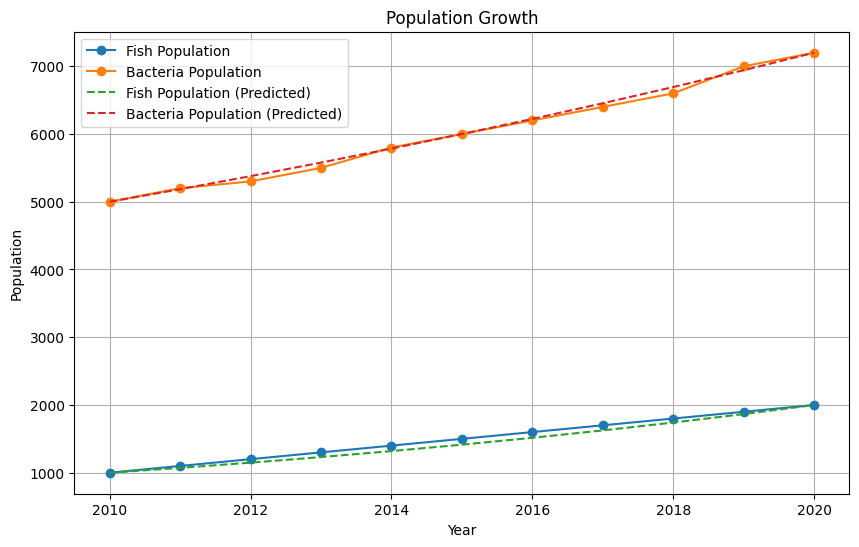

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Fish Population'], label='Fish Population', marker='o')
plt.plot(data['Year'], data['Bacteria Population'], label='Bacteria Population', marker='o')
plt.plot(data['Year'], fish_population_growth, linestyle='--', label='Fish Population (Predicted)')
plt.plot(data['Year'], bacteria_population_growth, linestyle='--', label='Bacteria Population (Predicted)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Growth')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()